In [33]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from tqdm import tqdm
from sklearn.neighbors import KNeighborsClassifier

In [34]:
def plotting(S, energy_threshold,img, image_name,folder):
    total_energy = np.sum(S**2)
    cumulative_energy = np.cumsum(S**2) / total_energy
    
    # Determina il numero di valori singolari necessari
    k = np.argmax(cumulative_energy >= energy_threshold) + 1
    
    # Plot dell'immagine originale
    plt.figure(figsize=(12, 6))
    
    # Plot dell'immagine originale
    plt.subplot(1, 3, 1)
    plt.imshow(img, cmap='gray')
    plt.title(f"Image: {image_name}\nFolder: {folder}")
    
    
    # Plot dei valori singolari
    plt.subplot(1, 3, 2)
    plt.plot(S, label="Singular value")
    plt.axvline(k, color='red', linestyle='--', label=f"k = {k}")
    plt.title(f"Singular value of {image_name}")
    plt.xlabel("Index singular value")
    plt.ylabel("Singular value")
    plt.legend()
    
    # Plot dell'energia cumulativa
    plt.subplot(1, 3, 3)
    plt.plot(cumulative_energy, label="Cumulative energy")
    plt.axvline(k, color='red', linestyle='--', label=f"k = {k}")
    plt.title(f"Cumulative energy\nThreshold: {energy_threshold * 100:.1f}%")
    plt.xlabel("Index singular value")
    plt.ylabel("Cumulative energy")
    plt.legend()
    
    plt.tight_layout()
    plt.show()

In [35]:
def images_svd(dataset_path, energy_threshold=0.90):
   
    images = [] 
    labels = [] 
    
    #folder is the name of the subfolder(s1,s2...)
    for folder in tqdm(os.listdir(dataset_path)):
        folder_path = os.path.join(dataset_path, folder)
        
        for image_name in os.listdir(folder_path):
            
            image_path = os.path.join(folder_path, image_name)
            
            img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            
            if img is not None:
                
                img = img / 255.0  # Normalize the pixel in [0, 1]
                
                U, S, Vt =np.linalg.svd(img)
                
                #plotting(S, energy_threshold, img, image_name, folder)
                
                
                images.append(img.flatten())  
                labels.append(folder)  
                
    return np.array(images), np.array(labels)

In [36]:
dataset_path = 'Kaggle/' 
images, labels= images_svd(dataset_path)

100%|██████████| 40/40 [00:04<00:00,  9.81it/s]


In [37]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.3, random_state=30,stratify=labels)

In [38]:
k = 90  # number of first singular values

U, S, Vt = np.linalg.svd(X_train)

X_train_reduced_svd = np.dot(U[:, :k], np.diag(S[:k]))
X_test_reduced_svd = np.dot(X_test, Vt.T[:, :k])

knn = KNeighborsClassifier(
    n_neighbors=3,
    weights='distance',  
    metric='euclidean',
    n_jobs=-1   
)

knn.fit(X_train_reduced_svd, y_train)

y_pred = knn.predict(X_test_reduced_svd)

accuracy = accuracy_score(y_test, y_pred)
print(f"SVD Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=1))

SVD Accuracy: 94.17%

Classification Report:
               precision    recall  f1-score   support

          s1       1.00      1.00      1.00         3
         s10       1.00      0.33      0.50         3
         s11       1.00      1.00      1.00         3
         s12       1.00      1.00      1.00         3
         s13       1.00      1.00      1.00         3
         s14       1.00      1.00      1.00         3
         s15       1.00      1.00      1.00         3
         s16       1.00      1.00      1.00         3
         s17       1.00      1.00      1.00         3
         s18       0.75      1.00      0.86         3
         s19       1.00      1.00      1.00         3
          s2       1.00      1.00      1.00         3
         s20       1.00      1.00      1.00         3
         s21       1.00      1.00      1.00         3
         s22       1.00      1.00      1.00         3
         s23       0.75      1.00      0.86         3
         s24       1.00      1.00  

In [39]:
pca = PCA(n_components=2)
X_train_reduced_pca = pca.fit_transform(X_train)
X_test_reduced_pca = pca.transform(X_test)


knn_pca = KNeighborsClassifier(
    n_neighbors=3,
    weights='distance', 
    metric='euclidean', 
    n_jobs=-1           
)


knn_pca.fit(X_train_reduced_pca, y_train)

y_pred_pca = knn_pca.predict(X_test_reduced_pca)

accuracy_pca = accuracy_score(y_test, y_pred_pca)
print(f"PCA Accuracy: {accuracy_pca * 100:.2f}%")
print("\nPCA Classification Report:\n", classification_report(y_test, y_pred_pca, zero_division=1))

PCA Accuracy: 43.33%

PCA Classification Report:
               precision    recall  f1-score   support

          s1       0.67      0.67      0.67         3
         s10       0.50      0.33      0.40         3
         s11       1.00      0.67      0.80         3
         s12       0.50      0.33      0.40         3
         s13       0.29      0.67      0.40         3
         s14       1.00      0.33      0.50         3
         s15       0.75      1.00      0.86         3
         s16       0.50      0.33      0.40         3
         s17       0.50      0.33      0.40         3
         s18       0.67      0.67      0.67         3
         s19       0.00      0.00      0.00         3
          s2       0.50      0.67      0.57         3
         s20       0.00      0.00      0.00         3
         s21       0.50      0.33      0.40         3
         s22       1.00      1.00      1.00         3
         s23       0.50      0.33      0.40         3
         s24       0.50      0.

In [40]:
def reconstruct_and_display_side_by_side(images, U, S, Vt, pca, k, original_shape=(112, 92)):
    num_images = 7  
    
    for i in range(num_images):
        fig, axes = plt.subplots(1, 3, figsize=(15, 5))
                
        original_img = images[i].reshape(original_shape)
        
        reconstructed_svd = (U[i:i+1, :k] @ np.diag(S[:k]) @ Vt[:k, :]).reshape(original_shape)
        reconstructed_pca = pca.inverse_transform(pca.transform(images[i:i+1])).reshape(original_shape)
        
        # Plots
        axes[0].imshow(original_img, cmap="gray")
        axes[0].set_title(f"Original Image {i}")
        axes[0].axis("off")
        
        axes[1].imshow(reconstructed_svd, cmap="gray")
        axes[1].set_title(f"Reconstructed SVD (k={k})")
        axes[1].axis("off")
        
        axes[2].imshow(reconstructed_pca, cmap="gray")
        axes[2].set_title(f"Reconstructed PCA (k={2})")
        axes[2].axis("off")
        
        plt.tight_layout()
        plt.show()

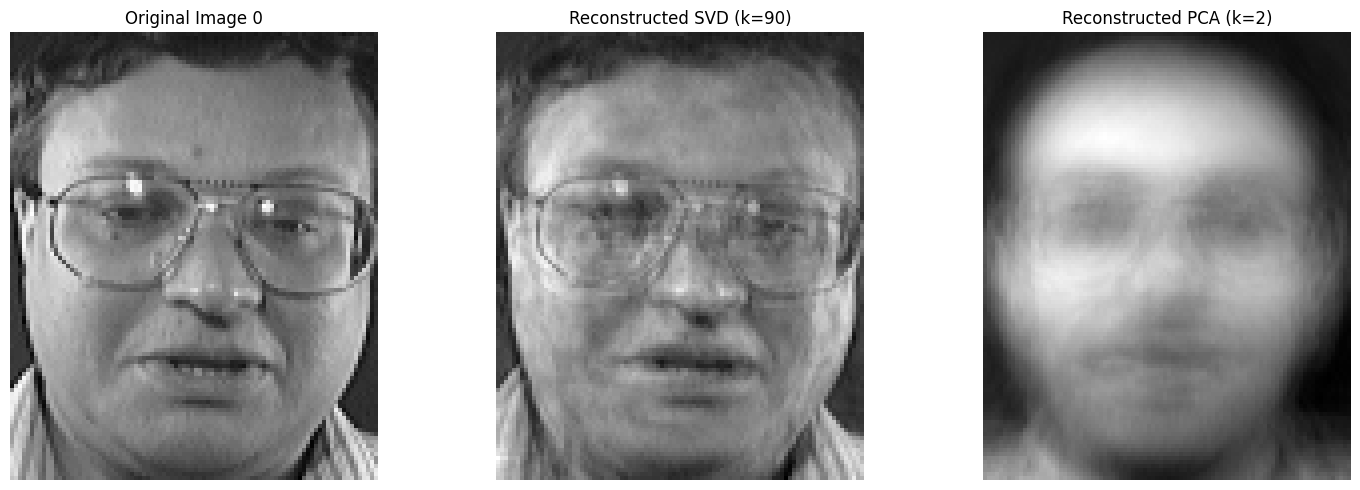

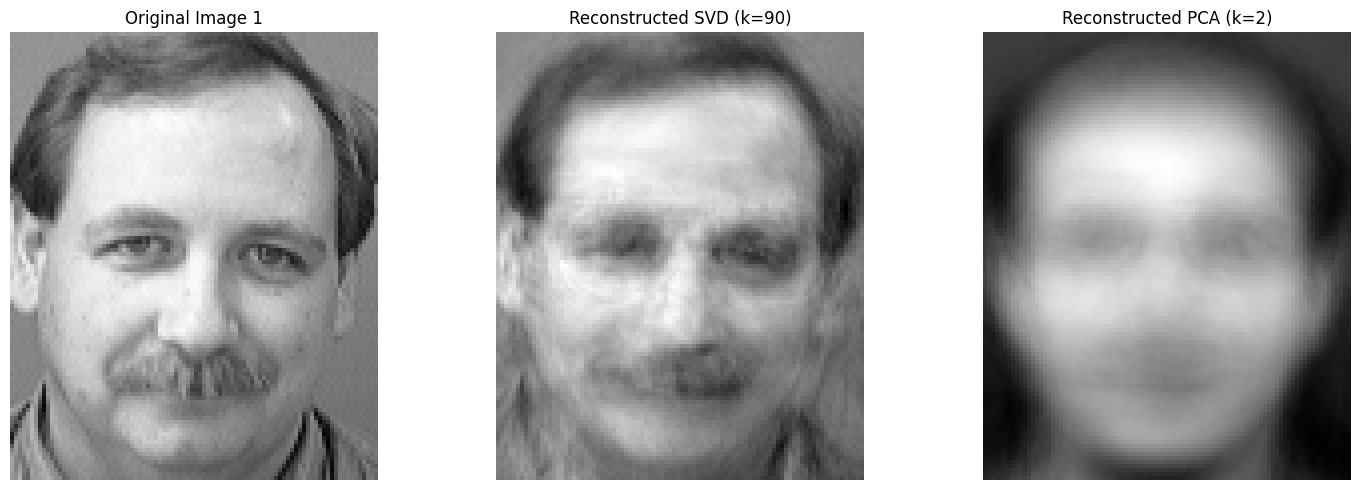

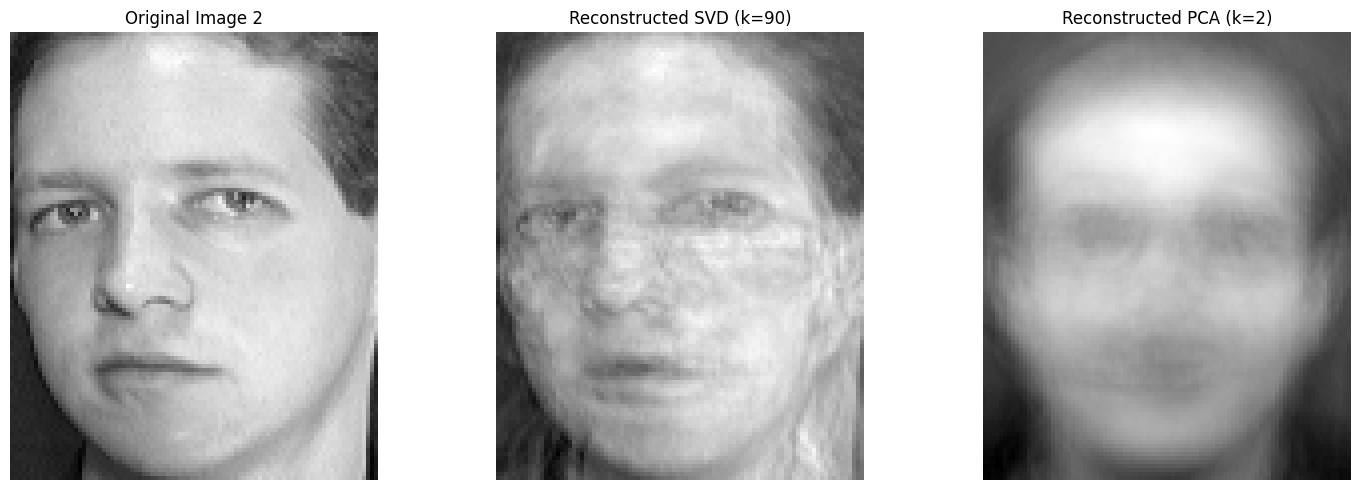

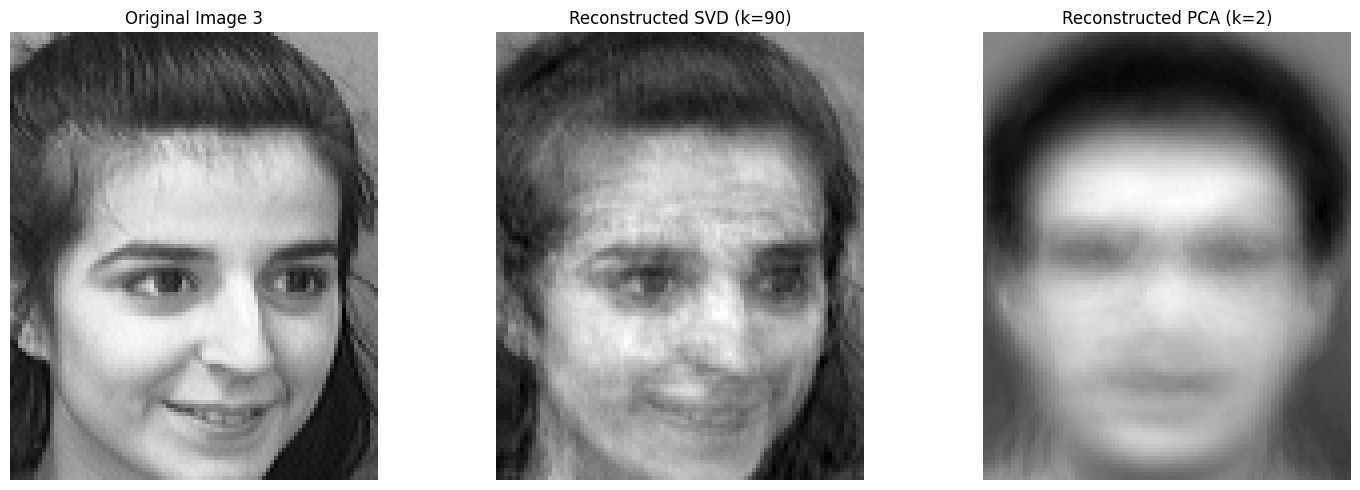

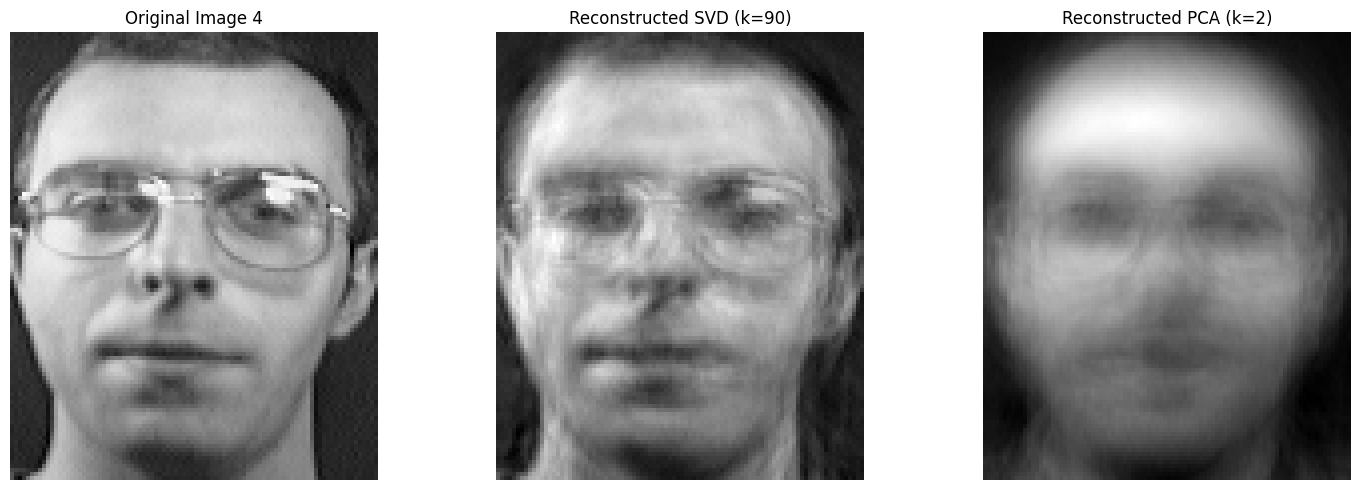

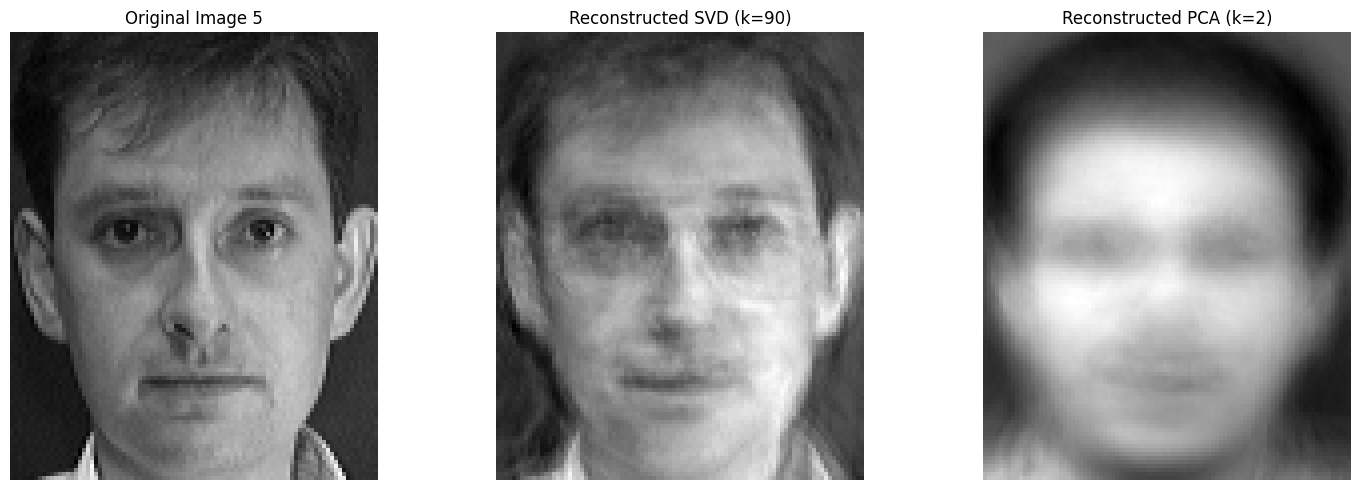

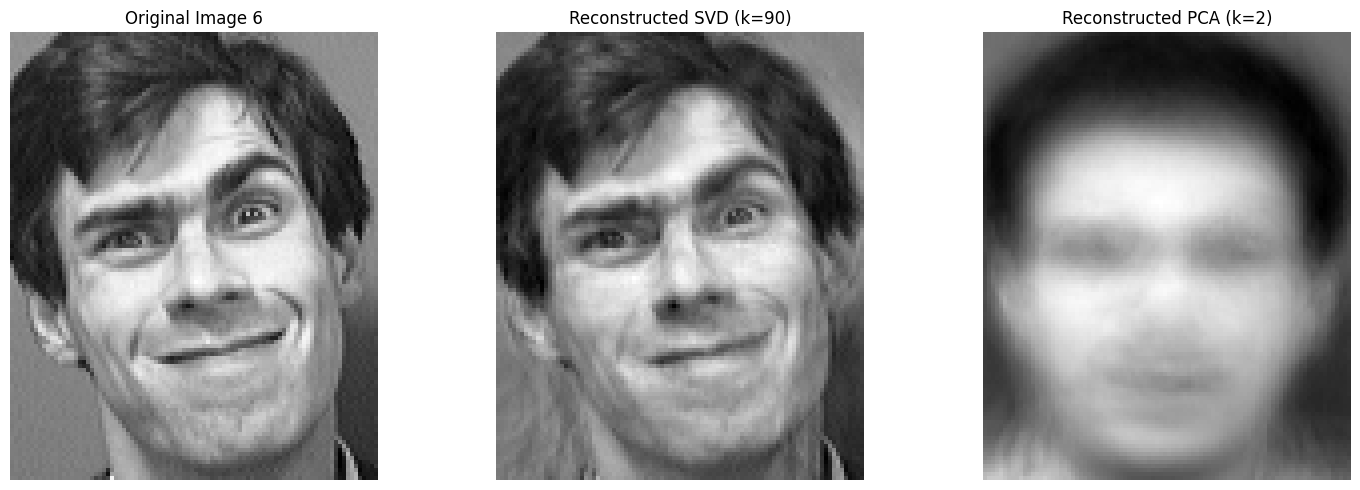

In [41]:
reconstruct_and_display_side_by_side(
    X_train,
    U,
    S,
    Vt,
    pca,
    k=k,
    original_shape=(112, 92)
)